In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Wine_clust.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.isna().sum() #checking for null values

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [4]:
from sklearn.cluster import KMeans

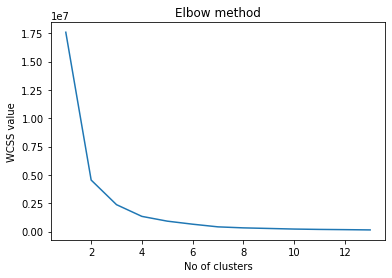

In [ ]:
wcss=[]
for i in range(1,14):# taking number of clusters= values from 1 to 13
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)#n_clusters no of cluster,k++ is to avoid random intilalization trap
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)#inertia_ is to get WCSS value
plt.plot(range(1,14),wcss)#plotting and finding elbow point for optimim number of clusters
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS value')
plt.show()

In [ ]:
#Trying optimum number of clusters =4
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(data)
y_kmeans

array([1, 1, 3, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 2, 2,
       1, 1, 1, 2, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 2], dtype=int32)

In [ ]:
#Silhouette score
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(data,y_kmeans)
sil_avg

0.5572288268257268

In [ ]:
#Trying optimum number of clusters =3
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(data)
y_kmeans
#Silhouette score
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(data,y_kmeans)
sil_avg

0.571138193786884

**So the optimum number of clusters can be taken as 3 as it has a better silhouette score**

***Hierarchical Clustering-Agglomerative clustering***

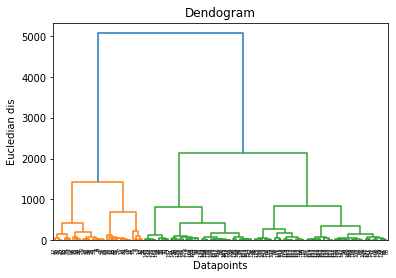

In [ ]:
import scipy.cluster.hierarchy as sch
#plot dendogram
dendogram=sch.dendrogram(sch.linkage(data,method='ward'))#ward is to adjust the variance when creating dendogram
plt.title('Dendogram')
plt.xlabel('Datapoints')
plt.ylabel('Eucledian dis')
plt.show()

In [ ]:
#optimim no of cluster =2
#create agglomerative hc with number of clusters as 2
from sklearn.cluster import AgglomerativeClustering
#creating instance
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')#affinity is method used for dis calc
#by default affinity as eucledian,linkage used to adjust variance of clusters which are being merged
y_hc=hc.fit_predict(data)

In [ ]:
#Silhouette score
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(data,y_hc)
sil_avg

0.6587292996216912

***DB SCAN CLUSTERING***

In [5]:
from sklearn.cluster import DBSCAN

In [29]:
X=np.array(data)

In [36]:
clustering=DBSCAN(eps=3, min_samples=2).fit(data)
clustering.labels_
#where eps is The maximum distance between two samples for one to be considered as in the neighborhood of the other.
#min_samples The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1,  2, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [37]:
y_db=clustering.fit_predict(data)


In [38]:
#Silhouette score
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(data,y_db)
sil_avg


-0.5389236625410517